In [1]:
# Dependencies
#%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# read csv file
regi_fueltype = "./Resources/Vehicle_Reg_FuelType.csv"

regi_fueltype_df = pd.read_csv(regi_fueltype)


regi_fueltype_df

,State,Electric (EV),Plug-In Hybrid Electric (PHEV),Hybrid Electric (HEV),Biodiesel,Ethanol/Flex (E85),Compressed Natural Gas (CNG),Propane,Hydrogen,Methanol,Gasoline,Diesel,Unknown Fuel,Year
0,Alabama,8700,4400,50800,48100,449800,100,100,0,0,4077100,126100,30300,2022
1,Alaska,2000,700,9000,8700,48600,0,0,0,0,457100,30500,5500,2022
2,Arizona,65800,20400,150800,61200,446000,600,800,0,0,5476100,198700,70100,2022
3,Arkansas,5100,2500,30600,33300,283900,200,0,0,0,2229500,89700,10600,2022
4,California,903600,361100,1514000,183900,1338000,10300,1500,14900,0,31059000,725300,8200,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Virginia,20500,11200,157800,0,618500,12200,0,0,0,6646500,183700,46800,2020
149,Washington,50500,18400,211300,0,424000,18700,0,0,0,5687600,326300,95300,2020
150,West Virginia,600,700,11900,0,178200,2800,0,0,0,1216500,57800,14200,2020
151,Wisconsin,6300,5900,82500,0,755700,8700,0,0,0,4494600,175200,41900,2020


In [3]:
# Copy dataset to show only EV's, PHEV, HEV, Gasoline per year
ev_regi_df = regi_fueltype_df[['State','Electric (EV)','Plug-In Hybrid Electric (PHEV)', 'Hybrid Electric (HEV)', 'Gasoline', 'Year']].copy()

ev_regi_df

,State,Electric (EV),Plug-In Hybrid Electric (PHEV),Hybrid Electric (HEV),Gasoline,Year
0,Alabama,8700,4400,50800,4077100,2022
1,Alaska,2000,700,9000,457100,2022
2,Arizona,65800,20400,150800,5476100,2022
3,Arkansas,5100,2500,30600,2229500,2022
4,California,903600,361100,1514000,31059000,2022
...,...,...,...,...,...,...
148,Virginia,20500,11200,157800,6646500,2020
149,Washington,50500,18400,211300,5687600,2020
150,West Virginia,600,700,11900,1216500,2020
151,Wisconsin,6300,5900,82500,4494600,2020


In [4]:
ev_regi_data = ev_regi_df.set_index(['Year'])
group_year_data = ev_regi_data.groupby('Year')
ev_regi_EV = group_year_data['Electric (EV)'].sum()
ev_regi_PHEV = group_year_data['Plug-In Hybrid Electric (PHEV)'].sum()
ev_regi_HEV = group_year_data['Hybrid Electric (HEV)'].sum()


ev_regi_summary = pd.DataFrame({
    'Electric (EV)': ev_regi_EV,
    'Plug-In Hybrid Electric (PHEV)': ev_regi_PHEV,
    'Hybrid Electric (HEV)': ev_regi_HEV
})

ev_regi_summary


,Electric (EV),Plug-In Hybrid Electric (PHEV),Hybrid Electric (HEV)
Year,,,
2020,1018900,594400,4813700
2021,1454400,786800,5491800
2022,2442300,1012400,6291800


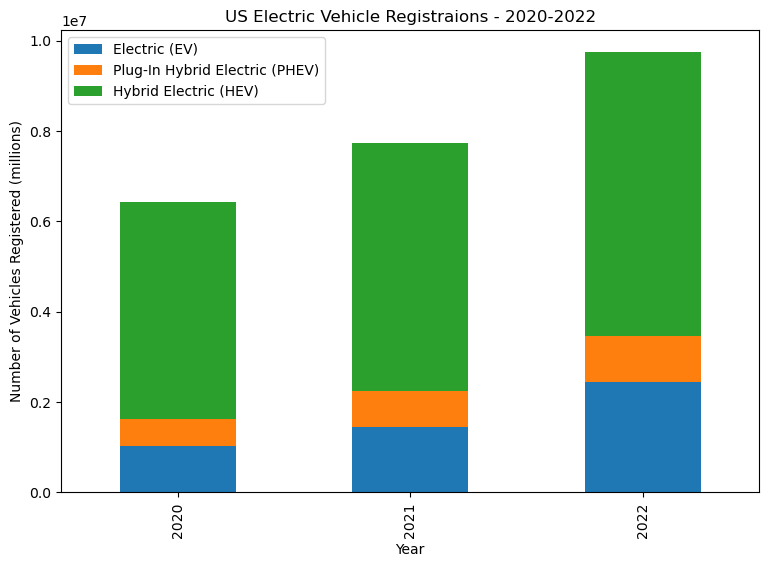

In [5]:
ev_regi_summary.plot(kind='bar', stacked=True, figsize=(9,6))

plt.title('US Electric Vehicle Registraions - 2020-2022')
plt.ylabel('Number of Vehicles Registered (millions)')
plt.show()
